<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Lego_Analysis_for_Course_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

By: Jacob Baum
(Image credit to where it's due)

<img src="https://th.bing.com/th/id/R.6b4091497616d5b8da5495db498b861c?rik=JtmNy0qqMNXFKQ&riu=http%3a%2f%2fimages.brickset.com%2fsets%2fimages%2f1682-1.jpg&ehk=foVtN1j4i9bDDsF2qx%2b5WLwCt687xv7FdIfoeblsqao%3d&risl=&pid=ImgRaw&r=0"/>

# Import Statements

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [56]:
df = pd.read_csv("colors.csv")

In [115]:
df.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [113]:
# Filter out rows where "name" is "Unknown"
filtered_df = df[df["name"] != "Unknown"]

# Get the count of unique colors after filtering
unique_colors = filtered_df["name"].nunique()
print(unique_colors)

134


134 unqiue colors!

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [117]:
trans_column = filtered_df["is_trans"]
number_of_trans_pieces = 0

for trans in trans_column:
  if trans == "t":
    number_of_trans_pieces += 1
print(number_of_trans_pieces)

28


28 non transparent pieces

In [118]:
number_of_non_trans_pieces = trans_column.value_counts().get("f", 0)
print(number_of_non_trans_pieces)

106


106 transparent pieces

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png"/>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"/>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [61]:
sets_df = pd.read_csv("sets.csv")

In [62]:
sets_df.head(5)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [63]:
sets_df.tail(5)

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [64]:
sets_df.sort_values("year", ascending=True, inplace=True)
sets_df.head(1)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


1949!

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [65]:
sets_df[sets_df["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


5 sets were on sale in 1949!

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [66]:
sets_df_desc_num_parts = sets_df.sort_values("num_parts", ascending=False)
sets_df_desc_num_parts.head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [67]:
sets_per_year = sets_df.groupby("year").count()
sets_per_year["set_num"].head(5)

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

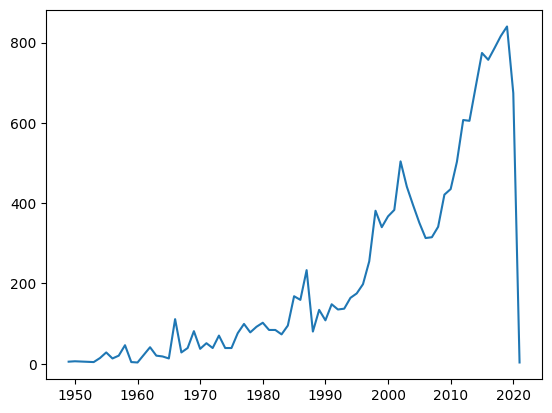

In [68]:
plt.plot(sets_per_year.index, sets_per_year['set_num'])

Fixing the 2020 year by dropping it from the chart...

Text(0, 0.5, '# of lego sets')

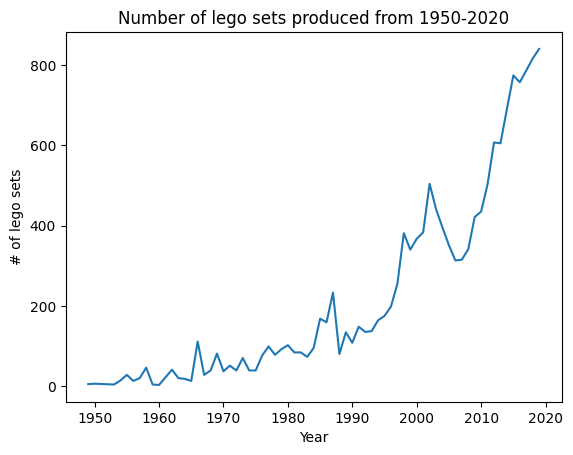

In [69]:
plt.plot(sets_per_year.index[:-2], sets_per_year['set_num'][:-2])
plt.title("Number of lego sets produced from 1950-2020")
plt.xlabel("Year")
plt.ylabel("# of lego sets")

1990s saw a increase in lego sets year until the early 2000s and then saw increasing sets at a decreasing rate until the late 2000s where number of lego set appeared to be growing again exponentially.

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [70]:
themes_per_year = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_per_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

Text(0, 0.5, 'Mumber of Themes')

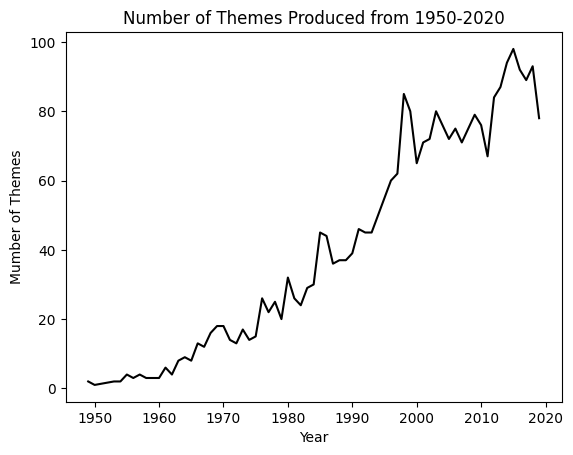

In [71]:
plt.plot(themes_per_year.index[:-2], themes_per_year["theme_id"][:-2], color="black")
plt.title("Number of Themes Produced from 1950-2020")
plt.xlabel("Year")
plt.ylabel("Mumber of Themes")

Text(0, 0.5, '# of lego sets')

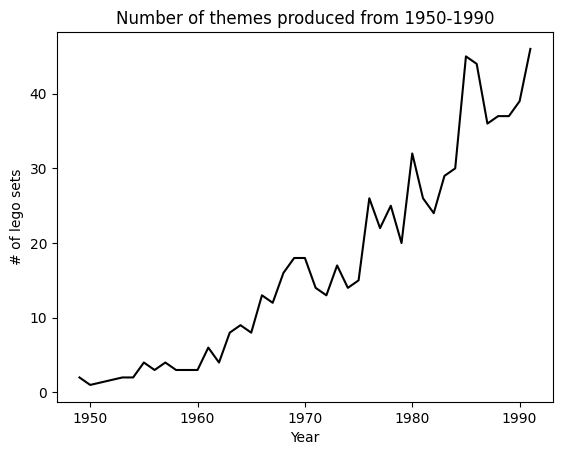

In [72]:
plt.plot(themes_per_year.index[:-30], themes_per_year["theme_id"][:-30], color="black")
plt.title("Number of themes produced from 1950-1990")
plt.xlabel("Year")
plt.ylabel("# of lego sets")

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

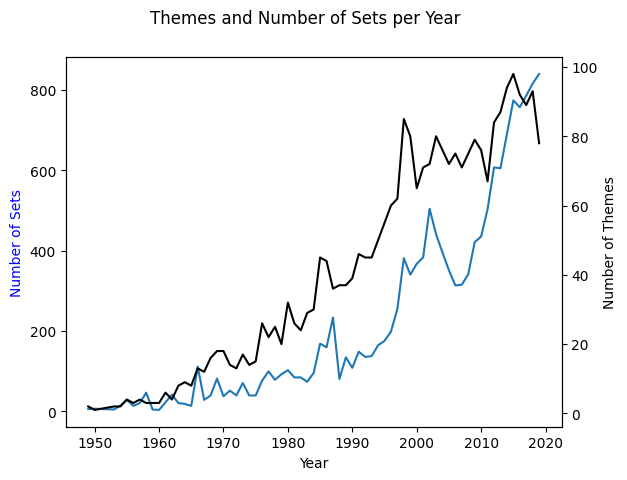

In [73]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_per_year.index[:-2], sets_per_year['set_num'][:-2])
ax2.plot(themes_per_year.index[:-2], themes_per_year["theme_id"][:-2], color="black")

plt.suptitle("Themes and Number of Sets per Year", fontsize=12)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="blue")
ax2.set_ylabel("Number of Themes", color="black")

We see a similar pattern with the number of themes compared to the total number of lego sets produced each year from 1950-2003

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [74]:
average_number_of_pieces = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})

In [75]:
average_number_of_pieces.head(5)

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

Text(0, 0.5, 'Average number of Lego Pieces')

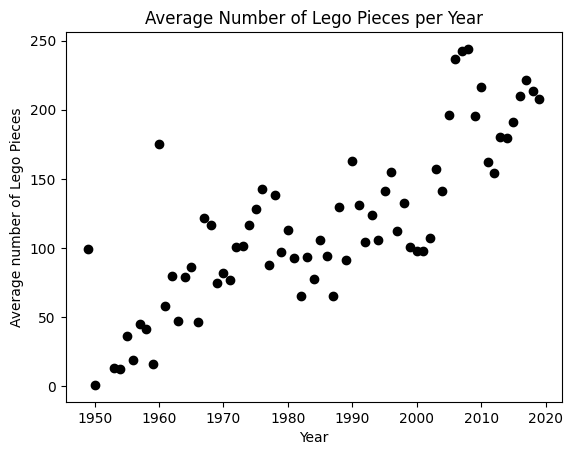

In [76]:
plt.scatter(average_number_of_pieces.index[:-2], average_number_of_pieces["num_parts"][:-2], color="black")
plt.title("Average Number of Lego Pieces per Year")
plt.xlabel("Year")
plt.ylabel("Average number of Lego Pieces")

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [77]:
# Before using the keys
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
510      1
455      1
34       1
415      1
530      1
Name: count, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: <img src="https://i.imgur.com/Sg4lcjx.png"/>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [78]:
themes_df = pd.read_csv("themes.csv")
themes_df.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [79]:
# Serach for Star Wars
themes_df[themes_df["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [80]:
# Investigate the id "18", 209 and 158 more
sets_df[sets_df["theme_id"] == 18]

,set_num,name,year,theme_id,num_parts
12066,8002-1,Destroyer Droid,2000,18,567
12058,8001-1,Battle Droid,2000,18,336
12051,8000-1,Pit Droid,2000,18,223
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
15273,K8008-1,Darth Vader / Stormtrooper Kit,2002,18,0
12083,8012-1,Super Battle Droid,2002,18,378
12081,8011-1,Jango Fett,2002,18,425
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388


In [81]:
sets_df[sets_df["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312


In [82]:
sets_df[sets_df["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts
10704,7151-1,Sith Infiltrator,1999,158,244
10702,7150-1,TIE Fighter & Y-wing,1999,158,410
10694,7141-1,Naboo Fighter,1999,158,179
10579,7121-1,Naboo Swamp,1999,158,82
10627,7128-1,Speeder Bikes,1999,158,93
...,...,...,...,...,...
11269,75268-1,Snowspeeder,2020,158,91
11270,75269-1,Duel on Mustafar,2020,158,208
11271,75270-1,Obi-Wan's Hut,2020,158,200
11273,75271-1,Luke Skywalker's Landspeeder,2020,158,236


### Merging (i.e., Combining) DataFrames based on a Key


In [91]:
df_set_theme_count = pd.DataFrame({"id": set_theme_count.index,
                                "set_count": set_theme_count.values})
df_set_theme_count.head(5)

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [92]:
merged_df = pd.merge(df_set_theme_count, themes_df, on="id")
merged_df.head(5)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

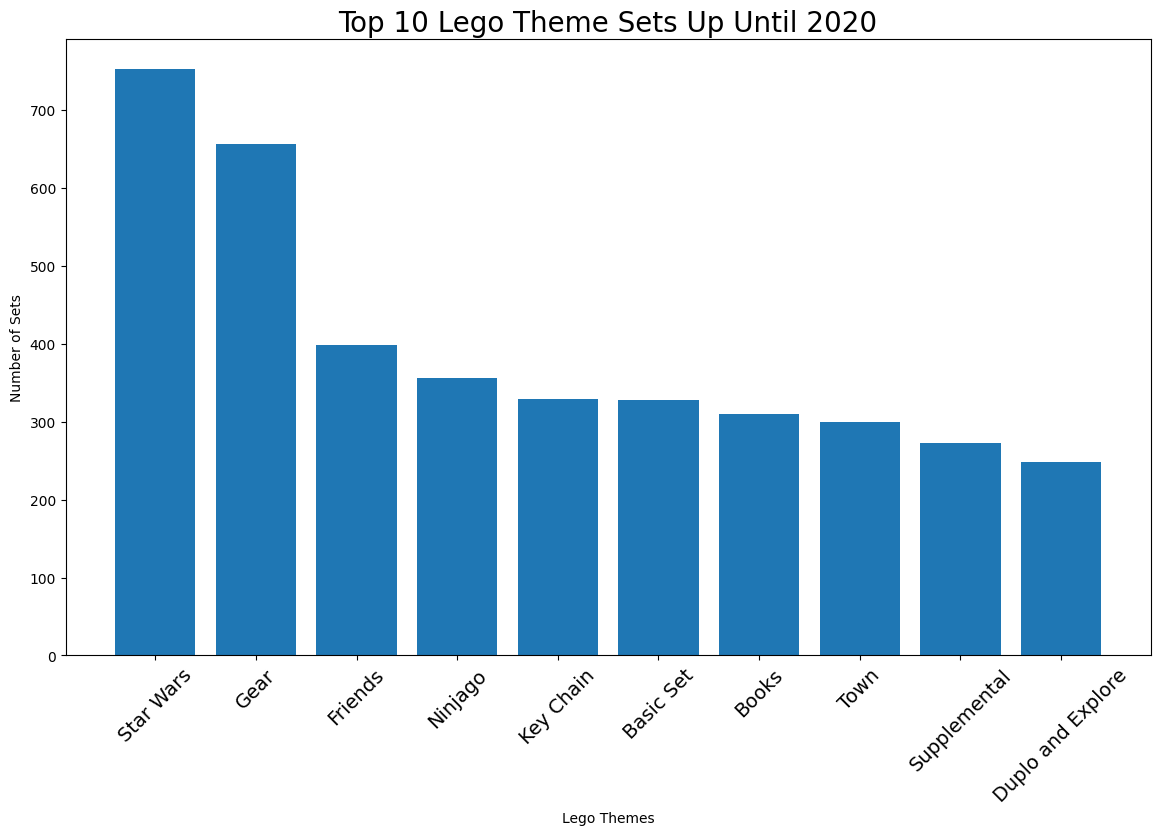

In [97]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.title("Top 10 Lego Theme Sets Up Until 2020", fontsize=20)
plt.xlabel("Lego Themes")
plt.ylabel("Number of Sets")
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10])

Seems like Star Wars and "Gear" are the most popular sets sold. Let's see what Gear entails...

In [106]:
themes_df[themes_df["name"] == "Gear"]

,id,name,parent_id
407,501,Gear,NaN


In [109]:
sets_df[sets_df["theme_id"] == 501]

,set_num,name,year,theme_id,num_parts
10354,710-2,Lockable Storage Case,1966,501,1
15555,pk1062,Road Safety Kit Poster,1981,501,0
7744,5701-1,LEGO Loco,1998,501,0
7742,5700-1,LEGO Creator,1998,501,0
15546,P1520-1,Adventure Pen Series 1,1999,501,0
...,...,...,...,...,...
13192,853986-1,Customizable Weapon Set,2020,501,0
13213,854030-1,Empire State Building Magnet Build,2020,501,25
13214,854031-1,Statue of Liberty Magnet,2020,501,11
13216,854033-1,Ninjago Sword of Destiny,2020,501,0


# Summary (2020 Anaysis)

- Lego's top products recently (in 2020) were Gear and Star Wars.
- Lego has increased the number of average parts per set since the 50s. With an experiential increase initally.
- They seem to be focusing on the number of sets more than making more themes.